In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# DATA 607 - Machine Learning

## Lecture 1: Introduction

### 2025.06.30


#### Machine learning

- _Learn_, from data $(x_i, y_i)$, relationship between _variables_ $x$ and $y$.

- Relationship is _stochastic_:

  $$
  y\sim p(y\mid x)
  $$

- $p$ is _unknown_ and _unknowable_.

- Learn an approximation to $p$ itself or to its **regression function**,

  $$
  f(x) =\mathbb{E}[y\mid x].
  $$


#### Example: Predicting sales from ad spend

> "Suppose that we are statistical consultants hired by a client to
> investigate the association between advertising and sales of a particular
> product."

- We're given sales numbers and ad spend on TV, radio, and newspaper for 200 markets.

- We don't know $p$, the true distribution of sales given ad spend, but we might approximate it by the **linear model**:

  $$
  p \approx \operatorname{Normal}(\texttt{sales}\mid a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper},\,\sigma^2)
  $$

- If we don't care about $\sigma^2$, we might just estimate the regression function, $f$:
  $$
  \begin{aligned}
  f(\texttt{TV},\,\texttt{radio},\,\texttt{newspaper}) &= \mathbb{E}[\texttt{sales}\mid \texttt{TV},\,\texttt{radio},\,\texttt{newspaper}]\\
  &\approx a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper}
  \end{aligned}
  $$


#### Example: Credit card default prediction

- We want to predict whether a customers will default on their credit card debt based on income, monthly balance, and studentness.

- We model a customer defaulting using the **logistic regression model**:
  $$
  y\sim \operatorname{Bernoulli}\big(\texttt{default}\mid p\big),
  $$
  where
  $$
  \log\left(\frac p{1-p}\right) = a + b\,\texttt{income}+c\,\texttt{balance} + d\,\texttt{student}
  $$


#### Predictive models can inform decisions

- How can we adjust our advertising stragety to increase sales?

- Should we approve an applicants credit card application?

##### ⚠ Models don't know the big picture. ⚠

- Our advertising model doesn't know about Youtube, Facebook, TikTok, etc. It gives a single predictive model for all 200 markets, so it has no "local knowledge".

- Decision on a credit card application depends on our risk tolerance in addition to the applicant's risk. Also, we need to decide on an interest rate.


#### Inference from models

- Sometimes, it's okay to use a model as a _black box_ for generating predictions.

- Other times, we want more refined, granular understanding of the association between the target/output variable $y$ and the input/feature/predictor variables $x$.

  - Statistical hypothesis tests about model parameters.

  - Model **_interpretation_** and **_insights_**.

#### Interpreting the coefficient of a binary feature in a logistic regression model

- Odds of defaulting:&nbsp;
  $\displaystyle{{o} = \frac{p}{1-p}}$
- From the logistic regression model:

  $$
  \begin{aligned}
  \log\frac{o_{\text{student}}}
  {o_{\text{nonstudent}}} &=
  \log\left(\frac{p_{\text{student}}}{1-p_{\text{student}}}\right) - \log\left(\frac{p_{\text{nonstudent}}}{1-p_{\text{nonstudent}}}\right)\\
  &= \phantom{-}(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(1))\\&\phantom{=}-(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(0))\\
  &= d\\
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} &= e^{d}\approx 0.54
  \end{aligned}
  $$

- **_The odds of a student defaulting are roughly half those of a nonstudent with comparable income and balance._**


#### Exercise

- For each of the following target variables $y$, what feature variables $x$ might be associated with $y$? Would a model predicting $y$ from these $x$ be useful as _black box_ for generating predictions? Could useful inferences be drawn from such a model?

  - $y$ = weight of newborn baby

  - $y$ = demand for avocados

  - $y$ = standardized test score

  - $y$ = Customer purchased upgrade?

  - $y$ = Cancer returned within 10 years?

  - $y$ = next token


#### Fitting a `scikit-learn` model to data

```python
import pandas as pd
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/Default.csv")
X = data[["income", "balance", "student"]]
y = data["default"]

model = LogisticRegression()
model.fit(X, y)
print(model.intercept_, model.coef_)
```

`[-10.9018116] [[ 3.96189932e-06  5.73060606e-03 -6.12564504e-01]]`


#### Using a `scikit-learn` model to predict class labels

- Will a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  x = pd.DataFrame({
      "income": [10000, 10000],
      "balance": [1950, 1950],
      "student": [1, 0]
  })
  model.predict(x)
  ```

  `array([0, 1])`

- The model perdicts that the student won't default (prediction `0`) but the nonstudent will (prediction `1`).


#### Using a `scikit-learn` model to predict probabilities

- What is the probability that a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  model.predict_proba(x)
  ```

  ```
  array([[0.57446092, 0.42553908],
       [0.42250727, 0.57749273]])
  ```

- The first column of the output is probability of class label `0` (no default); the second column is the probability of class label `1` (default).

- The predicted class label is the one with the larger probability:

  ```python
  assert np.all(model.predict_proba(x).argmax(axis=1) == model.predict(x))
  ```


#### Exercises

- **(1)** Use the probabilities from `model.predict_proba(x)` to confirm that

  $$
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} = 0.54.
  $$

- **(2)** The file `data/enroll.csv` contains (fake) historical data on SAT scores and GPAs of university applicants, together with the scholarship they were offered and whether they ended up enrolling.

  - **(a)** Fit a logistic regression model to predict whether a student will enroll given their SAT score, GPA, and scholarship offer.

  - **(b)** Plot predicted enrollment probability versus scholarship offer for a student with an SAT score of 1300 and a GPA of 3.3. What scholarship offer will result in an 80% chance of such a student enrolling?


In [14]:
# (a)

from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/Default.csv")

X = data[["income", "balance", "student"]]
y = data["default"]

model = LogisticRegression()
model.fit(X, y)
a = model.intercept_
[b, c, d] = model.coef_.squeeze()
print(f"e^d = {np.exp(d):.2f}")  # 0.54, see above!

x = pd.DataFrame(
    {"income": [104400, 104400], "balance": [1950, 1950], "student": [1, 0]}
)
p = model.predict_proba(x)
p_student = p[0, 1]
p_nonstudent = p[1, 1]

o_student = p_student / (1 - p_student)
o_nonstudent = p_nonstudent / (1 - p_nonstudent)
print(f"o_student/o_nonstudent = {o_student/o_nonstudent:.2f}")  # 0.54

e^d = 0.54
o_student/o_nonstudent = 0.54


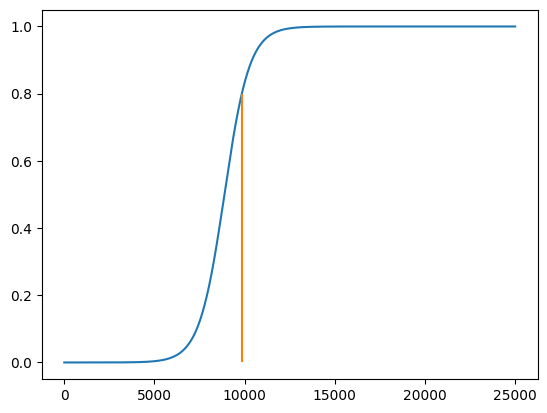

In [15]:
# (b)

data = pd.read_csv("data/enroll.csv")
X = data[["SAT", "GPA", "scholarship"]]
y = data["did_enroll"]

model = LogisticRegression()
model.fit(X, y)

scholarship = np.linspace(0, 25000, 1000)

x_test = pd.DataFrame(
    {
        "SAT": np.full_like(scholarship, 1300),
        "GPA": np.full_like(scholarship, 3.3),
        "scholarship": scholarship,
    }
)
p_test = model.predict_proba(x_test)[:, 1]
plt.plot(scholarship, p_test)


s0 = scholarship[np.argmax(p_test >= 0.8)]
plt.vlines(s0, 0, 0.8, colors="C1")

#### What's a model good for?


- We've fit a model predicting whether a university applicant will accept an admission offer based on SAT score, GPA, and scholarship offer. 👏

- Now what?

#### Prescriptive analytics

- "using data to determine an optimal course of action" [source](https://online.hbs.edu/blog/post/prescriptive-analytics)

- How could an admissions office use our model?

#### Constrained optimization

- Help an admissions office optimize allocation of a scholarship budget $\$B$ with the goal of maximizing expected enrollment.

- data for $i$-th applicant: $\operatorname{SAT}_i$, $\operatorname{GPA}_i$

- scholarship offer for $i$-th applicant: $x_i$ (**decision variable**)

- probability that $i$-th applicant will enroll: $p_i$

  \begin{aligned}
  \text{Maximize:} & &\sum_i p_i\\
  \text{subject to}:&&x_i&\geq 0\\
  & &\sum_i x_i &\leq B\\
  && p_i &= \operatorname{model}(x_i, \operatorname{SAT}_i, \operatorname{GPA}_i)
  \end{aligned}
  $$

In [16]:
df = pd.read_csv("data/enroll.csv")
display(df)

df_train = df.iloc[:200]
X_train = df_train[["SAT", "GPA", "scholarship"]]
y_train = df_train["did_enroll"]

pred_model = LogisticRegression()
pred_model.fit(X_train, y_train)

,SAT,GPA,scholarship,did_enroll
0,1507,3.72,16400.0,0
1,1532,3.93,5200.0,0
2,1487,3.77,16700.0,0
3,1259,3.05,12100.0,1
4,1354,3.39,16500.0,1
...,...,...,...,...
19995,1139,3.03,12100.0,1
19996,1371,3.39,12600.0,0
19997,1424,3.72,8500.0,0
19998,1170,3.01,7300.0,1


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
import gurobipy as gp
from gurobi_ml.sklearn.logistic_regression import add_logistic_regression_constr

import gurobipy_pandas  # patches DataFrame and Series with .gppd accessors

# prepare applicant pool dataset
df_test = df.iloc[200:400].copy()
scholarship_test = df_test.pop("scholarship")

# set budget
B = scholarship_test.sum() / 5

# initialize optimization model
opt_model = gp.Model(name="admissions")
opt_model.setAttr("ModelSense", gp.GRB.MAXIMIZE)

# variables for optimization problem
variables = df_test[["SAT", "GPA"]].gppd.add_vars(
    opt_model, name="scholarship", lb=0, ub=25000
)
variables = variables.gppd.add_vars(opt_model, name="enroll_prob", lb=0, ub=1, obj=1)

# constraints for optimization model
budget = opt_model.addConstr(variables["scholarship"].sum() <= B, name="budget")
pred_constr = add_logistic_regression_constr(
    opt_model,
    pred_model,
    input_vars=variables[["SAT", "GPA", "scholarship"]],
    output_vars=variables["enroll_prob"],
    output_type="probability_1",  # output_vars are the probabilities of enrollment (class label 1), not the class labels themselves
)

# compute optimal allocation
opt_model.optimize()

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 201 rows, 1000 columns and 1000 nonzeros
Model fingerprint: 0x7c5b974a
Model has 200 function constraints treated as nonlinear
  200 LOGISTIC
Variable types: 1000 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [9e-04, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 2e+04]
  RHS range        [1e+02, 3e+05]
Presolve removed 200 rows and 668 columns
Presolve time: 0.00s
Presolved: 1032 rows, 333 columns, 2343 nonzeros
Presolved model has 166 nonlinear constraint(s)

Solving non-convex MINLP

Variable types: 333 continuous, 0 integer (0 binary)

Root relaxation: objective 1.128233e+02, 165 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | I

In [18]:
display(variables)

,SAT,GPA,scholarship,enroll_prob
200,1232,2.90,<gurobi.Var scholarship[200] (value 3445.31216...,<gurobi.Var enroll_prob[200] (value 0.92731236...
201,1272,3.12,<gurobi.Var scholarship[201] (value 8184.82374...,<gurobi.Var enroll_prob[201] (value 0.92728930...
202,1375,3.44,<gurobi.Var scholarship[202] (value 0.0)>,<gurobi.Var enroll_prob[202] (value 7.60530543...
203,1328,3.19,<gurobi.Var scholarship[203] (value 14668.4175...,<gurobi.Var enroll_prob[203] (value 0.92898544...
204,1389,3.51,<gurobi.Var scholarship[204] (value 0.0)>,<gurobi.Var enroll_prob[204] (value 1.65085008...
...,...,...,...,...
395,1109,2.77,<gurobi.Var scholarship[395] (value 0.0)>,<gurobi.Var enroll_prob[395] (value 0.99999639...
396,1571,3.78,<gurobi.Var scholarship[396] (value 0.0)>,<gurobi.Var enroll_prob[396] (value 9.44969462...
397,1042,2.68,<gurobi.Var scholarship[397] (value 0.0)>,<gurobi.Var enroll_prob[397] (value 1.0)>
398,1315,3.26,<gurobi.Var scholarship[398] (value 13220.9772...,<gurobi.Var enroll_prob[398] (value 0.92813527...


In [19]:
mask = variables["scholarship"].gppd.X > 0
offers = variables["scholarship"][mask].gppd.X
print(
    f"{len(offers)} scholarship offers with values between ${int(offers.min())} and ${int(offers.max())} and mean value ${int(offers.mean())}."
)
print(f"${int(offers.sum())} commited out of ${int(B)}.")
print(f"Expected enrollment is {int(variables["enroll_prob"].gppd.X.sum())}.")

44 scholarship offers with values between $56 and $15322 and mean value $6958.
$306180 commited out of $306180.
Expected enrollment is 112.


#### Nonparametric models

- Sometimes (often), linear models just don't fit a dataset.

- By contrast, nonparametric models are extremely flexible and can be fit to datasets displaying nonlinear patterns.

- There are tradeoffs! More on those later.


#### Example: Curve fitting

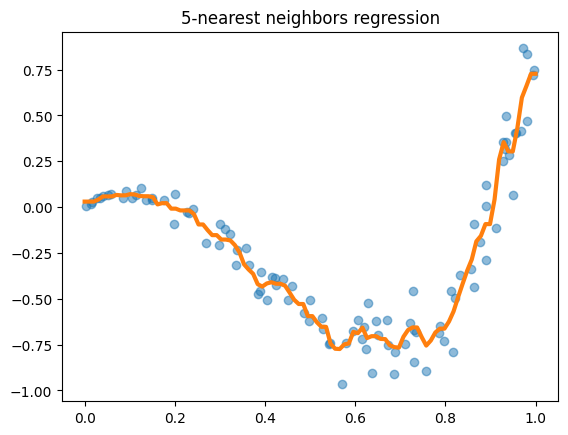

In [20]:
from sklearn.neighbors import KNeighborsRegressor


def make_data(n=100, random_state=None):
    rng = np.random.default_rng(random_state)
    x = rng.uniform(size=n)
    y = 10 * x * (x - 0.2) * (x - 0.9) + 10 * x * 0.02 * rng.normal(size=n)
    return x, y


x, y = make_data(random_state=0)
X = x.reshape(-1, 1)
plt.scatter(x, y, alpha=0.5)

model = KNeighborsRegressor()
model.fit(X, y)

u = np.linspace(0, 1, 100)
v = model.predict(u.reshape(-1, 1))
plt.title("5-nearest neighbors regression")
plt.plot(u, v, lw=3, color="C1")
plt.show()

In [21]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors()
nn.fit(X)

u = np.linspace(0, 1, 200)
U = u.reshape(-1, 1)
distances, indices = nn.kneighbors(U)
print(indices[:5])

assert np.all(distances[:, 1:] > distances[:, :-1])  # distances increase along rows
assert np.all(indices == np.abs(U - X.T).argsort(axis=1)[:, :5])  # broadcasting! 😎

w = y[indices].mean(axis=1)  # average the y-values for the nearest neighbors

assert np.allclose(w, model.predict(U))

[[11 92  3 20 13]
 [11 92  3 20 13]
 [92  3 11 20 13]
 [92  3 11 20 13]
 [ 3 92 20 13 11]]


#### Challenge exercise

1. Write your own version of `NearestNeighbors.kneighbors` to compute nearest neighbors for a $p$-dimensional dataset. (We did the $1$-dimensional case above.) Concretely, write a function that takes as input:

   - an integer `n_neighbors`;

   - a 2-dimensional numpy array `X_train`;

   - a 2-dimensional numpy array `X_test`;

   and returns a tuple `(distances, indices)`, where

   - `indices` is the numpy array of shape `(X_test.shape[0], n_neighbors)` whose `i`-th row lists the indices of the `n_neighbors` elements (rows) of `X_train` closest (Euclidean distance) to `X_test[i]`, listed in increasing order of distance;

   - `distance` is the numpy array of shape `(X_test.shape[0], n_neighbors)` whose `(i, j)`-entry is the distance from `X_test[i]` to `X_train[indices[i, j]]`.

   Check your work using randomly generated data and `NearestNeighbors.kneighbors`.


In [22]:
def kneighbors(n_neighbors, X_train, X_test):
    ...  # Your work here!
    return distances, indices

2. Redo the previous exercise in the "scikit-learn style".

   Instead of writing a function `kneighbors`, write a class `MyNearestNeighbors` such that:

   - It's initilization method takes a single integer argument `n_neighbors` and stores it on the instance.

   - It has a `fit` method that takes a single `ndarray` argument `X_train` and stores it on the instance.

   - It has a `kneighbors` method that takes a single `ndarray argument `X_test`as input and outputs a tuple`(indices, distances)` as in the previous exercise.

   If you identify as hard-core, use [`sklearn.utils.estimator_checks.check_estimator`](sklearn.utils.estimator_checks.check_estimator) to verify that your estimator conforms to Scikit Learn conventions. Further reading: [Developing scikit-learn estimators](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator)


In [23]:
class MyNearestNeighbors:
    def __init__(self, n_neighbors): ...  # Your work here!

    def fit(self, X_train): ...  # Your work here!

    def kneighbors(self, X_test):
        ...  # Your work here!
        return (distances, indices)

### Nearest neighbors classification


#### Choices!


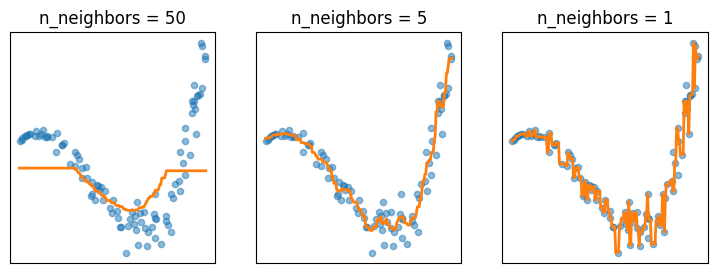

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), sharex=True, sharey=True)

for ax, n_neighbors in zip(axes, [50, 5, 1]):
    ax.scatter(x, y, alpha=0.5, s=20)
    ax.set_xticks([])
    ax.set_yticks([])
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X, y)
    v = model.predict(u.reshape(-1, 1))
    ax.plot(u, v, lw=2, color="C1")

axes[0].set_title("n_neighbors = 50")
axes[1].set_title("n_neighbors = 5")
axes[2].set_title("n_neighbors = 1")
plt.show()

#### Quality of fit

- For regression models, the most commonly used measure of fit quality is **mean-squared error (MSE)**.

  $$
  \operatorname{MSE} = \frac1n\sum_{i<n}(y_i - \hat{f}(x_i))^2
  $$

- For the nearest neighbors fits computed above:
  <center>

  | `n_neighbors` | MSE  |
  | ------------: | ---- |
  |            50 | 0.13 |
  |             5 | 0.01 |
  |             1 | 0.00 |

  </center>

- Is the 1-nearest neighbors fit better than the 5-nearest neighbors fit?
